In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load_n = 50 # from 280
X_train = np.load('data/X_train.npy')#[0:load_n]
y = np.genfromtxt('data/y_1.csv', delimiter='\n')#[0:load_n]
#data_test = np.load('data/X_test.npy')

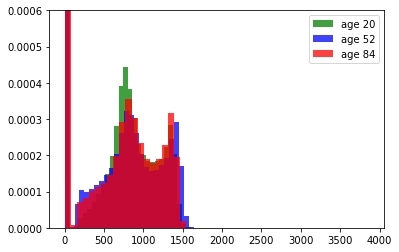

In [36]:
# Let's take a look at the values
# 0 has age 20, 9 has 52, 3 has age  84,
plt.hist(X_train[0], 50, normed=1, facecolor='green', alpha=0.75, label='age 20')
plt.hist(X_train[9], 50, normed=1, facecolor='blue', alpha=0.75, label='age 52')
plt.hist(X_train[3], 50, normed=1, facecolor='red', alpha=0.75, label='age 84')
plt.ylim([0, 0.0006])
#plt.xlim([0, 2000]) # nearly no values >2000
plt.legend()
plt.show()

In [7]:
stats = []
for i in range(0, len(X_train)):
    d = X_train[i]
    stats.append([
        np.mean(d),
        np.std(d),
        np.var(d),
        np.max(d),
        np.count_nonzero(d),
        
        # make bins
        ((1 < d) & (d <= 600)).sum(),
        ((600 < d) & (d <= 900)).sum(),
        ((900 < d) & (d <= 1200)).sum(),
        ((1200 < d) & (d <= 1600)).sum(),
    ])

vlog = np.vectorize(lambda x: np.log(x + 1))
y_log = vlog(y)

In [61]:
# Correlations of statistics with age
print("mean:", np.correlate([x[0] for x in stats], y)[0])
print("std:", np.correlate([x[2] for x in stats], y)[0])
print("var:", np.correlate([x[3] for x in stats], y)[0])
print("max:", np.correlate([x[4] for x in stats], y)[0])
print("non zero:", np.correlate([x[5] for x in stats], y)[0])
print()
print("1 ... 600:", np.correlate([x[6] for x in stats], y)[0])
print("600 ... 900:", np.correlate([x[7] for x in stats], y)[0])
print("900 ... 1200:", np.correlate([x[8] for x in stats], y)[0])
print("1200 ... 1600:", np.correlate([x[9] for x in stats], y)[0])

mean: 3472866.09663
median: 0.0
std: 6483530.51802
var: 2821063166.15
max: 48540935.0
non zero: 24848754508.0

1 ... 600: 5511038229.0
600 ... 900: 6925174661.0
900 ... 1200: 6018091890.0
1200 ... 1600: 6331339441.0


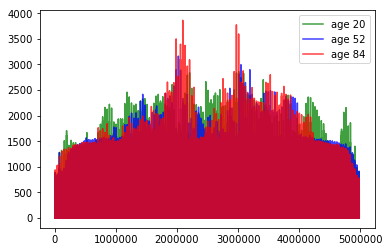

In [35]:
#np.save('data/X_train_sm.npy', X_train[:50])
#np.savetxt('data/y_1_log.csv', y_log, delimiter='\n')

plt.plot(list(range(0, len(X_train[0][672000 : -786000]))), X_train[0][672000 : -786000], color='green', alpha=0.75, label='age 20')
plt.plot(list(range(0, len(X_train[9][672000 : -786000]))), X_train[9][672000 : -786000], color='blue', alpha=0.75, label='age 52')
plt.plot(list(range(0, len(X_train[3][672000 : -786000]))), X_train[3][672000 : -786000], color='red', alpha=0.75, label='age 84')
plt.legend()
plt.show()

In [5]:
#for i in range(0, len(X_train)):
#    d = X_train[i]
#    print(d[0:672000].sum(), d[-786000:].sum())

l = 60
row = X_train[1][672000 : -786000]
num_bins = int(len(row) / l)
row = row[0 : num_bins*l] # crop last elements, they are probably 0 anyway
splits = np.split(row, num_bins)
#list(zip(np.mean(splits, axis=1), np.max(splits, axis=1)))

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
sc = StandardScaler()
no = Normalizer()

X_train = sc.fit_transform(X_train)

plt.plot(list(range(0, len(X_train[0][672000 : -786000]))), X_train[0][672000 : -786000], color='green', alpha=0.75, label='age 20')
plt.plot(list(range(0, len(X_train[1][672000 : -786000]))), X_train[1][672000 : -786000], color='blue', alpha=0.75, label='age 25')
plt.plot(list(range(0, len(X_train[4][672000 : -786000]))), X_train[4][672000 : -786000], color='red', alpha=0.75, label='age 23')
plt.legend()
plt.show()

In [36]:
# For some slices (columns) through all rows compute std
l = 30
num_bins = int(len(X_train[0][672000 : -786000]) / l)
means = []
for i in range(0, len(X_train)):
    row = X_train[i][672000 : -786000]
    row = row[0 : num_bins*l]
    splits = np.split(row, num_bins)
    means.append(np.mean(splits, axis=1))

col_std = []
for col in np.array(means).T:
    col_std.append(np.std(col))


In [37]:
#plt.hist(y, 50, normed=1, facecolor='green', alpha=0.75, label='age 20')
#plt.show()
col_std = np.array(col_std)
list((col_std == 0))
zero_std_ind = np.where(col_std==0)[0]
np.savetxt('data/zero_std_ind_'+str(l)+'.csv', zero_std_ind, delimiter=',')
print(len(zero_std_ind), 'are zero of', len(col_std), ', used len:', l)

92212 are zero of 166166 , used len: 30


In [33]:
y
len(col_std)
#len(np.genfromtxt('data/zero_std_ind.csv', delimiter=','))

147900